# Default Customers Model

Background: 
Client is a payment gateway that lets consumers split purchases into 4 interest free installments, every two weeks. The first 25% is taken when the order is received, and the remaining 3 installments of 25% are automatically taken every 14 days. They help customers  manage their cash-flow and help merchants increase conversion rates and average order values.

This Machine learning program is based on the dataset provided by client. Dataset includes historical orders of customers and their repayment status. An order is considered in defaulted if any of the installments have not been paid. Our aim is to 
keep approval rates high (allow as many customers to transact as possible) while reducing the total defaulted payments.
We need to analyze the data and design a classifier that can be used to approve future customers to pay in installments. 


The overall scope will includes the following:
-Exploratory data analysis(EDA)
-Build a classifier
-Solve following questions:
  ● Which features show strong correlation with a customer’s likelihood of paying back installments?
  ● Which features should be discarded? Why?
  ● What surprised you about the results/trends observed in the data?
  ● What additional data would you like to see that might help build a better installment approval classifier?
  ● What would be your next steps to train/build a model that we could use to make real time customer approval decisions?


In [2]:
#Import required Libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
path= r'C:\Users\USER\Desktop\DS\Quad'

In [4]:
df= pd.read_excel(path+str('/')+'orders.xlsx')

In [5]:
df.head()

,order_id,customer_id,merchant_id,order_amount,checkout_started_at,credit_decision_started_at,approved_for_installments,customer_credit_score,customer_age,customer_billing_zip,customer_shipping_zip,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4
0,42C39B,9D74A0,6881F9,147.20,2018-10-03 14:26:18.497,2018-10-03 14:26:18.997,True,626,26,95407,95407,1.0,1,1.0,1.0
1,A19AC4,2629AB,C37828,69.95,2018-09-21 16:55:03.443,2018-09-21 16:55:05.100,True,603,20,85007,85007,1.0,1,1.0,1.0
2,381AFF,793FE0,252600000000,45.00,2018-09-15 13:41:46.103,2018-09-15 13:41:47.197,True,648,41,30305-2646,30305-2646,1.0,1,1.0,1.0
3,3184A3,22C696,24FBAF,164.00,2018-10-10 00:59:25.793,2018-10-10 00:59:26.123,True,625,33,28562,28562,1.0,1,1.0,1.0
4,237711,D4E94A,6F498E,69.17,2018-09-12 22:53:08.970,2018-09-12 22:53:10.923,True,438,18,92324,92324,1.0,1,1.0,1.0


In [6]:
df.shape

(10000, 15)

In [7]:
df.describe()

,order_amount,customer_credit_score,customer_age,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4
count,10000.000000,10000.000000,10000.000000,9998.0,10000.000000,9996.000000,9423.000000
mean,146.252272,613.435900,33.544300,1.0,0.977900,0.959684,0.940359
std,167.883106,92.555118,11.933729,0.0,0.147016,0.196709,0.236834
min,4.950000,1.000000,18.000000,1.0,0.000000,0.000000,0.000000
25%,64.000000,562.000000,24.000000,1.0,1.000000,1.000000,1.000000
50%,90.765000,611.000000,30.000000,1.0,1.000000,1.000000,1.000000
75%,155.000000,664.000000,40.250000,1.0,1.000000,1.000000,1.000000
max,1936.000000,836.000000,89.000000,1.0,1.000000,1.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   order_id                    10000 non-null  object        
 1   customer_id                 10000 non-null  object        
 2   merchant_id                 10000 non-null  object        
 3   order_amount                10000 non-null  float64       
 4   checkout_started_at         10000 non-null  datetime64[ns]
 5   credit_decision_started_at  10000 non-null  datetime64[ns]
 6   approved_for_installments   10000 non-null  bool          
 7   customer_credit_score       10000 non-null  int64         
 8   customer_age                10000 non-null  int64         
 9   customer_billing_zip        9989 non-null   object        
 10  customer_shipping_zip       9977 non-null   object        
 11  paid_installment_1          9998 non-null   float64    

# Exploratory Data Analysis

Let's begin some exploratory data analysis. 
It is clearly observe that there are missing vaues in following columns:
-customer_billing_zip
-customer_shipping_zip
-paid_installment_1
-paid_installment_3
-paid_installment_4
Hence, we need to fix them.  

Also, there are categorical values present in following columns: 
-order_id
-customer_id
-merchant_id
-customer_billing_zip
-customer_shipping_zip

There are two columns having data types- datetime and bool, we will also deal with them in further steps.
We will explore other columns as well to make sure our final data is best suited to provide good effciency while using machine learning algorithms.

We'll start by checking out missing data!

In [9]:
#Checking duplicate values in data set
Duplicate= df.duplicated()
Duplicate.sum()

0

MISSING VALUES
We can use seaborn to create a simple heatmap to see where we are missing data.

<AxesSubplot:>

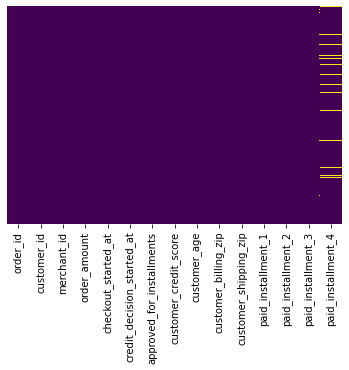

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#We can observe that feature 'paid_installment_4' has the maximum null values.  
Let's handle null values for customer_billing_zip and customer_shipping_zip first and then move on to other features

In [11]:
df['customer_billing_zip'].nunique()

5529

In [12]:
df['customer_billing_zip'].value_counts()

11236         18
11221         14
90046         14
35490         12
95148         12
              ..
73139          1
11704          1
11706          1
29412-8287     1
47834          1
Name: customer_billing_zip, Length: 5529, dtype: int64

In [13]:
#label encoding
customer_billing= dict(zip(df['customer_billing_zip'] ,pd.factorize(df['customer_billing_zip'])[0]+1 ))
df['customer_billing_zip'] = df['customer_billing_zip'].map(customer_billing)
df.head() 

,order_id,customer_id,merchant_id,order_amount,checkout_started_at,credit_decision_started_at,approved_for_installments,customer_credit_score,customer_age,customer_billing_zip,customer_shipping_zip,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4
0,42C39B,9D74A0,6881F9,147.20,2018-10-03 14:26:18.497,2018-10-03 14:26:18.997,True,626,26,1,95407,1.0,1,1.0,1.0
1,A19AC4,2629AB,C37828,69.95,2018-09-21 16:55:03.443,2018-09-21 16:55:05.100,True,603,20,2,85007,1.0,1,1.0,1.0
2,381AFF,793FE0,252600000000,45.00,2018-09-15 13:41:46.103,2018-09-15 13:41:47.197,True,648,41,3,30305-2646,1.0,1,1.0,1.0
3,3184A3,22C696,24FBAF,164.00,2018-10-10 00:59:25.793,2018-10-10 00:59:26.123,True,625,33,4,28562,1.0,1,1.0,1.0
4,237711,D4E94A,6F498E,69.17,2018-09-12 22:53:08.970,2018-09-12 22:53:10.923,True,438,18,5,92324,1.0,1,1.0,1.0


In [14]:
df['customer_shipping_zip'].nunique()

5488

In [15]:
#label encoding
customer_zip= dict(zip(df['customer_shipping_zip'] ,pd.factorize(df['customer_shipping_zip'])[0]+1 ))
df['customer_shipping_zip'] = df['customer_shipping_zip'].map(customer_zip)
df.head()  

,order_id,customer_id,merchant_id,order_amount,checkout_started_at,credit_decision_started_at,approved_for_installments,customer_credit_score,customer_age,customer_billing_zip,customer_shipping_zip,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4
0,42C39B,9D74A0,6881F9,147.20,2018-10-03 14:26:18.497,2018-10-03 14:26:18.997,True,626,26,1,1,1.0,1,1.0,1.0
1,A19AC4,2629AB,C37828,69.95,2018-09-21 16:55:03.443,2018-09-21 16:55:05.100,True,603,20,2,2,1.0,1,1.0,1.0
2,381AFF,793FE0,252600000000,45.00,2018-09-15 13:41:46.103,2018-09-15 13:41:47.197,True,648,41,3,3,1.0,1,1.0,1.0
3,3184A3,22C696,24FBAF,164.00,2018-10-10 00:59:25.793,2018-10-10 00:59:26.123,True,625,33,4,4,1.0,1,1.0,1.0
4,237711,D4E94A,6F498E,69.17,2018-09-12 22:53:08.970,2018-09-12 22:53:10.923,True,438,18,5,5,1.0,1,1.0,1.0


In [16]:
df['customer_shipping_zip'].value_counts()

0       23
509     17
757     15
725     14
2958    14
        ..
5329     1
3282     1
4946     1
5337     1
2047     1
Name: customer_shipping_zip, Length: 5489, dtype: int64

#Since customer_billing_zip and customer_shipping_zip features contain demographic information, let's replace the null values with new feature 'NULL'

In [17]:
df['customer_billing_zip']= df['customer_billing_zip'].fillna('NULL')
df['customer_shipping_zip']= df['customer_shipping_zip'].fillna('NULL')

In [18]:
#Checking null values after replacement
df['customer_billing_zip'].isnull().sum()

0

In [19]:
#Checking null values after replacement
df['customer_shipping_zip'].isnull().sum()

0

Handling null values for paid_installment_1, paid_installment_3 and paid_installment_4. Since the data is very limited, we can replace the null values for features as 1- Customers have paid their installments.
An order is considered in defaulted if any of the installments have not been paid.

In [20]:
df['paid_installment_1'].value_counts()

1.0    9998
Name: paid_installment_1, dtype: int64

In [21]:
df['paid_installment_3'].value_counts()

1.0    9593
0.0     403
Name: paid_installment_3, dtype: int64

In [22]:
df['paid_installment_4'].value_counts()

1.0    8861
0.0     562
Name: paid_installment_4, dtype: int64

Replacing all the null values in all installment features as 1. 
Removing the data would result in loss of information as the dataset is already small.
We can see that maximum number of null values are there in paid_installment_4 feature. 
We can assume that some customers have only opted for 3 installments. 

In [23]:
df['paid_installment_1']= df['paid_installment_1'].fillna(1)
df['paid_installment_3']= df['paid_installment_3'].fillna(1)
df['paid_installment_4']= df['paid_installment_4'].fillna(1)

In [24]:
#Checking null vallues in one the installment feature
df['paid_installment_1'].isnull().sum()

0

In [25]:
df= df.eval('sum_installment= paid_installment_1+paid_installment_2+paid_installment_3+paid_installment_4')

In [26]:
#Creating target feature 
#create a list of our conditions
conditions = [
    (df['sum_installment']==4),    
    (df['sum_installment']<4)]
#create a list of the values we want to assign for each condition
values = [1, 0]

#create a new column and use np.select to assign values to it using our lists as arguments
df['dependent_feature'] = np.select(conditions, values)

In [27]:
df.head()

,order_id,customer_id,merchant_id,order_amount,checkout_started_at,credit_decision_started_at,approved_for_installments,customer_credit_score,customer_age,customer_billing_zip,customer_shipping_zip,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4,sum_installment,dependent_feature
0,42C39B,9D74A0,6881F9,147.20,2018-10-03 14:26:18.497,2018-10-03 14:26:18.997,True,626,26,1,1,1.0,1,1.0,1.0,4.0,1
1,A19AC4,2629AB,C37828,69.95,2018-09-21 16:55:03.443,2018-09-21 16:55:05.100,True,603,20,2,2,1.0,1,1.0,1.0,4.0,1
2,381AFF,793FE0,252600000000,45.00,2018-09-15 13:41:46.103,2018-09-15 13:41:47.197,True,648,41,3,3,1.0,1,1.0,1.0,4.0,1
3,3184A3,22C696,24FBAF,164.00,2018-10-10 00:59:25.793,2018-10-10 00:59:26.123,True,625,33,4,4,1.0,1,1.0,1.0,4.0,1
4,237711,D4E94A,6F498E,69.17,2018-09-12 22:53:08.970,2018-09-12 22:53:10.923,True,438,18,5,5,1.0,1,1.0,1.0,4.0,1


In [28]:
df['sum_installment'].value_counts()

4.0    9306
3.0     342
2.0     212
1.0     140
Name: sum_installment, dtype: int64

In [29]:
df['dependent_feature'].value_counts()

1    9306
0     694
Name: dependent_feature, dtype: int64

In [30]:
df.drop('sum_installment',axis='columns', inplace=True)

In [31]:
#Checking null-values in all columns after updates.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   order_id                    10000 non-null  object        
 1   customer_id                 10000 non-null  object        
 2   merchant_id                 10000 non-null  object        
 3   order_amount                10000 non-null  float64       
 4   checkout_started_at         10000 non-null  datetime64[ns]
 5   credit_decision_started_at  10000 non-null  datetime64[ns]
 6   approved_for_installments   10000 non-null  bool          
 7   customer_credit_score       10000 non-null  int64         
 8   customer_age                10000 non-null  int64         
 9   customer_billing_zip        10000 non-null  int64         
 10  customer_shipping_zip       10000 non-null  int64         
 11  paid_installment_1          10000 non-null  float64    

In [32]:
#Checking values of approval_for_installments column (all should be true). We can drop this column as it doesnot add value. 
df['approved_for_installments'].value_counts()

True    10000
Name: approved_for_installments, dtype: int64

In [33]:
df.drop('approved_for_installments',axis='columns', inplace=True)

In [34]:
#Approved_for_installments column has been dropped
df.head()

,order_id,customer_id,merchant_id,order_amount,checkout_started_at,credit_decision_started_at,customer_credit_score,customer_age,customer_billing_zip,customer_shipping_zip,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4,dependent_feature
0,42C39B,9D74A0,6881F9,147.20,2018-10-03 14:26:18.497,2018-10-03 14:26:18.997,626,26,1,1,1.0,1,1.0,1.0,1
1,A19AC4,2629AB,C37828,69.95,2018-09-21 16:55:03.443,2018-09-21 16:55:05.100,603,20,2,2,1.0,1,1.0,1.0,1
2,381AFF,793FE0,252600000000,45.00,2018-09-15 13:41:46.103,2018-09-15 13:41:47.197,648,41,3,3,1.0,1,1.0,1.0,1
3,3184A3,22C696,24FBAF,164.00,2018-10-10 00:59:25.793,2018-10-10 00:59:26.123,625,33,4,4,1.0,1,1.0,1.0,1
4,237711,D4E94A,6F498E,69.17,2018-09-12 22:53:08.970,2018-09-12 22:53:10.923,438,18,5,5,1.0,1,1.0,1.0,1


#Creating seperate features for day,month and year for credit_decision_started_at and checkout_started_at 

In [35]:
df['day'] = pd.DatetimeIndex(df['credit_decision_started_at']).day
df['day1'] = pd.DatetimeIndex(df['checkout_started_at']).day
df.head()

,order_id,customer_id,merchant_id,order_amount,checkout_started_at,credit_decision_started_at,customer_credit_score,customer_age,customer_billing_zip,customer_shipping_zip,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4,dependent_feature,day,day1
0,42C39B,9D74A0,6881F9,147.20,2018-10-03 14:26:18.497,2018-10-03 14:26:18.997,626,26,1,1,1.0,1,1.0,1.0,1,3,3
1,A19AC4,2629AB,C37828,69.95,2018-09-21 16:55:03.443,2018-09-21 16:55:05.100,603,20,2,2,1.0,1,1.0,1.0,1,21,21
2,381AFF,793FE0,252600000000,45.00,2018-09-15 13:41:46.103,2018-09-15 13:41:47.197,648,41,3,3,1.0,1,1.0,1.0,1,15,15
3,3184A3,22C696,24FBAF,164.00,2018-10-10 00:59:25.793,2018-10-10 00:59:26.123,625,33,4,4,1.0,1,1.0,1.0,1,10,10
4,237711,D4E94A,6F498E,69.17,2018-09-12 22:53:08.970,2018-09-12 22:53:10.923,438,18,5,5,1.0,1,1.0,1.0,1,12,12


In [36]:
df['day'].value_counts()

12    550
4     482
2     476
5     457
13    447
1     443
3     443
14    437
11    418
29    417
6     405
7     397
30    392
10    388
8     378
9     374
21    345
28    296
31    245
27    236
26    203
25    202
22    196
24    196
20    188
23    184
18    178
19    172
16    159
15    159
17    137
Name: day, dtype: int64

In [37]:
df['day1'].value_counts()

12    550
4     482
2     476
5     457
13    447
1     443
3     443
14    437
11    418
29    417
6     405
7     397
30    392
10    388
8     378
9     374
21    345
28    296
31    245
27    236
26    203
25    202
22    196
24    196
20    188
23    184
18    178
19    172
16    159
15    159
17    137
Name: day1, dtype: int64

In [38]:
df['month'] = pd.DatetimeIndex(df['credit_decision_started_at']).month
df['month1'] = pd.DatetimeIndex(df['checkout_started_at']).month
df.head()

,order_id,customer_id,merchant_id,order_amount,checkout_started_at,credit_decision_started_at,customer_credit_score,customer_age,customer_billing_zip,customer_shipping_zip,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4,dependent_feature,day,day1,month,month1
0,42C39B,9D74A0,6881F9,147.20,2018-10-03 14:26:18.497,2018-10-03 14:26:18.997,626,26,1,1,1.0,1,1.0,1.0,1,3,3,10,10
1,A19AC4,2629AB,C37828,69.95,2018-09-21 16:55:03.443,2018-09-21 16:55:05.100,603,20,2,2,1.0,1,1.0,1.0,1,21,21,9,9
2,381AFF,793FE0,252600000000,45.00,2018-09-15 13:41:46.103,2018-09-15 13:41:47.197,648,41,3,3,1.0,1,1.0,1.0,1,15,15,9,9
3,3184A3,22C696,24FBAF,164.00,2018-10-10 00:59:25.793,2018-10-10 00:59:26.123,625,33,4,4,1.0,1,1.0,1.0,1,10,10,10,10
4,237711,D4E94A,6F498E,69.17,2018-09-12 22:53:08.970,2018-09-12 22:53:10.923,438,18,5,5,1.0,1,1.0,1.0,1,12,12,9,9


In [39]:
df['month'].value_counts()

9     5672
10    3611
8      717
Name: month, dtype: int64

In [40]:
df['month1'].value_counts()

9     5672
10    3611
8      717
Name: month1, dtype: int64

In [41]:
df['year'] = pd.DatetimeIndex(df['credit_decision_started_at']).year
df['year1'] = pd.DatetimeIndex(df['checkout_started_at']).year
df.head()

,order_id,customer_id,merchant_id,order_amount,checkout_started_at,credit_decision_started_at,customer_credit_score,customer_age,customer_billing_zip,customer_shipping_zip,...,paid_installment_2,paid_installment_3,paid_installment_4,dependent_feature,day,day1,month,month1,year,year1
0,42C39B,9D74A0,6881F9,147.20,2018-10-03 14:26:18.497,2018-10-03 14:26:18.997,626,26,1,1,...,1,1.0,1.0,1,3,3,10,10,2018,2018
1,A19AC4,2629AB,C37828,69.95,2018-09-21 16:55:03.443,2018-09-21 16:55:05.100,603,20,2,2,...,1,1.0,1.0,1,21,21,9,9,2018,2018
2,381AFF,793FE0,252600000000,45.00,2018-09-15 13:41:46.103,2018-09-15 13:41:47.197,648,41,3,3,...,1,1.0,1.0,1,15,15,9,9,2018,2018
3,3184A3,22C696,24FBAF,164.00,2018-10-10 00:59:25.793,2018-10-10 00:59:26.123,625,33,4,4,...,1,1.0,1.0,1,10,10,10,10,2018,2018
4,237711,D4E94A,6F498E,69.17,2018-09-12 22:53:08.970,2018-09-12 22:53:10.923,438,18,5,5,...,1,1.0,1.0,1,12,12,9,9,2018,2018


In [42]:
df['year'].value_counts()

2018    10000
Name: year, dtype: int64

In [43]:
# all the values are from 2018 only for checkout_started-at feature
df['year1'].value_counts()

2018    10000
Name: year1, dtype: int64

#As we can observe that credit_decision_started_at and checkout_started_at features have similiar values for day, month and year, 
#we can drop the  features- credit_decision_started_at(as day, month and year columns are created), checkout_started_at and its separated features-day1, month1 and year1. 

In [44]:
df.head()

,order_id,customer_id,merchant_id,order_amount,checkout_started_at,credit_decision_started_at,customer_credit_score,customer_age,customer_billing_zip,customer_shipping_zip,...,paid_installment_2,paid_installment_3,paid_installment_4,dependent_feature,day,day1,month,month1,year,year1
0,42C39B,9D74A0,6881F9,147.20,2018-10-03 14:26:18.497,2018-10-03 14:26:18.997,626,26,1,1,...,1,1.0,1.0,1,3,3,10,10,2018,2018
1,A19AC4,2629AB,C37828,69.95,2018-09-21 16:55:03.443,2018-09-21 16:55:05.100,603,20,2,2,...,1,1.0,1.0,1,21,21,9,9,2018,2018
2,381AFF,793FE0,252600000000,45.00,2018-09-15 13:41:46.103,2018-09-15 13:41:47.197,648,41,3,3,...,1,1.0,1.0,1,15,15,9,9,2018,2018
3,3184A3,22C696,24FBAF,164.00,2018-10-10 00:59:25.793,2018-10-10 00:59:26.123,625,33,4,4,...,1,1.0,1.0,1,10,10,10,10,2018,2018
4,237711,D4E94A,6F498E,69.17,2018-09-12 22:53:08.970,2018-09-12 22:53:10.923,438,18,5,5,...,1,1.0,1.0,1,12,12,9,9,2018,2018


In [45]:
#Dropping the columns
drop_elements = ['checkout_started_at', 'credit_decision_started_at', 'day1', 'month1','year1']
df= df.drop(drop_elements, axis = 1)
df.head()

,order_id,customer_id,merchant_id,order_amount,customer_credit_score,customer_age,customer_billing_zip,customer_shipping_zip,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4,dependent_feature,day,month,year
0,42C39B,9D74A0,6881F9,147.20,626,26,1,1,1.0,1,1.0,1.0,1,3,10,2018
1,A19AC4,2629AB,C37828,69.95,603,20,2,2,1.0,1,1.0,1.0,1,21,9,2018
2,381AFF,793FE0,252600000000,45.00,648,41,3,3,1.0,1,1.0,1.0,1,15,9,2018
3,3184A3,22C696,24FBAF,164.00,625,33,4,4,1.0,1,1.0,1.0,1,10,10,2018
4,237711,D4E94A,6F498E,69.17,438,18,5,5,1.0,1,1.0,1.0,1,12,9,2018


In [46]:
#Creating brackets for customer_credit_score to check the trend of defaulters 
df['customer_credit_score'].value_counts()

611    1728
524      68
650      52
1        49
655      49
       ... 
379       1
387       1
436       1
396       1
352       1
Name: customer_credit_score, Length: 448, dtype: int64

In [47]:
min_credit_score=df['customer_credit_score'].min()
max_credit_score= df['customer_credit_score'].max()
print(min_credit_score)
print(max_credit_score)

1
836


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='customer_credit_score'>

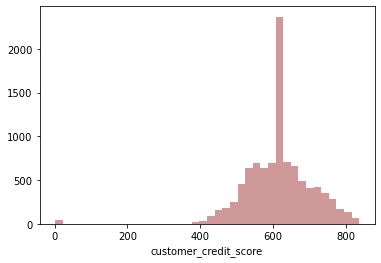

In [48]:
sns.distplot(df['customer_credit_score'],kde=False,color='darkred',bins=40)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


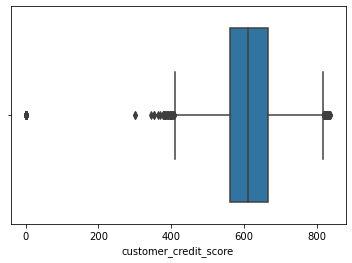

In [49]:
sns.boxplot(df['customer_credit_score'])
plt.show()

In [50]:
df['customer_credit_score'].describe()

count    10000.000000
mean       613.435900
std         92.555118
min          1.000000
25%        562.000000
50%        611.000000
75%        664.000000
max        836.000000
Name: customer_credit_score, dtype: float64

In [51]:
# We can see that outliers are present in the customer credit score. We can remove rows having credit score near to 1.
print(df.shape)
df= df[~(df['customer_credit_score']<200)]
print(df.shape)

(10000, 16)
(9951, 16)


In [52]:
#Customer credit brackets- credit score-0 if b/w 200 & 500, 1 if b/w 500 & 700, 2 b/w 700 & 900
df.loc[(df['customer_credit_score'] > 200) & (df['customer_credit_score'] <= 500), 'customer_credit_score'] = 0
df.loc[(df['customer_credit_score'] > 500) & (df['customer_credit_score'] <= 700), 'customer_credit_score'] = 1
df.loc[(df['customer_credit_score'] > 700) & (df['customer_credit_score'] <= 900), 'customer_credit_score'] = 2

In [53]:
df['customer_credit_score'].value_counts()

1    7582
2    1640
0     729
Name: customer_credit_score, dtype: int64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='order_amount'>

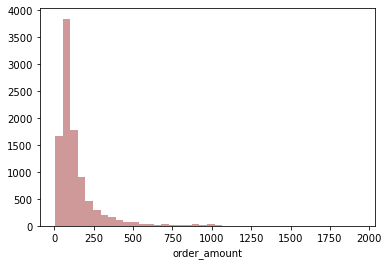

In [54]:
#Order amount spread in the dataset
sns.distplot(df['order_amount'],kde=False,color='darkred',bins=40)

In [55]:
df.head()

,order_id,customer_id,merchant_id,order_amount,customer_credit_score,customer_age,customer_billing_zip,customer_shipping_zip,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4,dependent_feature,day,month,year
0,42C39B,9D74A0,6881F9,147.20,1,26,1,1,1.0,1,1.0,1.0,1,3,10,2018
1,A19AC4,2629AB,C37828,69.95,1,20,2,2,1.0,1,1.0,1.0,1,21,9,2018
2,381AFF,793FE0,252600000000,45.00,1,41,3,3,1.0,1,1.0,1.0,1,15,9,2018
3,3184A3,22C696,24FBAF,164.00,1,33,4,4,1.0,1,1.0,1.0,1,10,10,2018
4,237711,D4E94A,6F498E,69.17,0,18,5,5,1.0,1,1.0,1.0,1,12,9,2018


In [56]:
df['merchant_id'].nunique()

105

In [57]:
#Creating brackets for customer_age to check the trend of defaulters 
df['customer_age'].value_counts()

25    460
24    456
23    445
22    436
26    429
     ... 
79      2
83      1
82      1
89      1
88      1
Name: customer_age, Length: 66, dtype: int64

In [58]:
min_age=df['customer_age'].min()
max_age= df['customer_age'].max()
print(min_age)
print(max_age)

18
89


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='customer_age'>

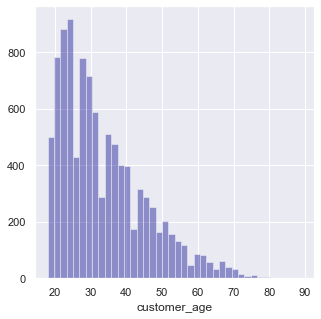

In [59]:
sns.set(rc={'figure.figsize':(5,5)})
sns.distplot(df['customer_age'],kde=False,color='darkblue',bins=40)

In [60]:
#Customer age brackets- age-0 if b/w 15&35, 1 if b/w 35&55, 2 if above 55
df.loc[(df['customer_age'] > 15) & (df['customer_age'] <= 35), 'customer_age'] = 0
df.loc[(df['customer_age'] > 35) & (df['customer_age'] <= 55), 'customer_age'] = 1
df.loc[(df['customer_age'] > 55) & (df['customer_age'] <= 90), 'customer_age'] = 2

In [61]:
df.head()

,order_id,customer_id,merchant_id,order_amount,customer_credit_score,customer_age,customer_billing_zip,customer_shipping_zip,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4,dependent_feature,day,month,year
0,42C39B,9D74A0,6881F9,147.20,1,0,1,1,1.0,1,1.0,1.0,1,3,10,2018
1,A19AC4,2629AB,C37828,69.95,1,0,2,2,1.0,1,1.0,1.0,1,21,9,2018
2,381AFF,793FE0,252600000000,45.00,1,1,3,3,1.0,1,1.0,1.0,1,15,9,2018
3,3184A3,22C696,24FBAF,164.00,1,0,4,4,1.0,1,1.0,1.0,1,10,10,2018
4,237711,D4E94A,6F498E,69.17,0,0,5,5,1.0,1,1.0,1.0,1,12,9,2018


<AxesSubplot:>

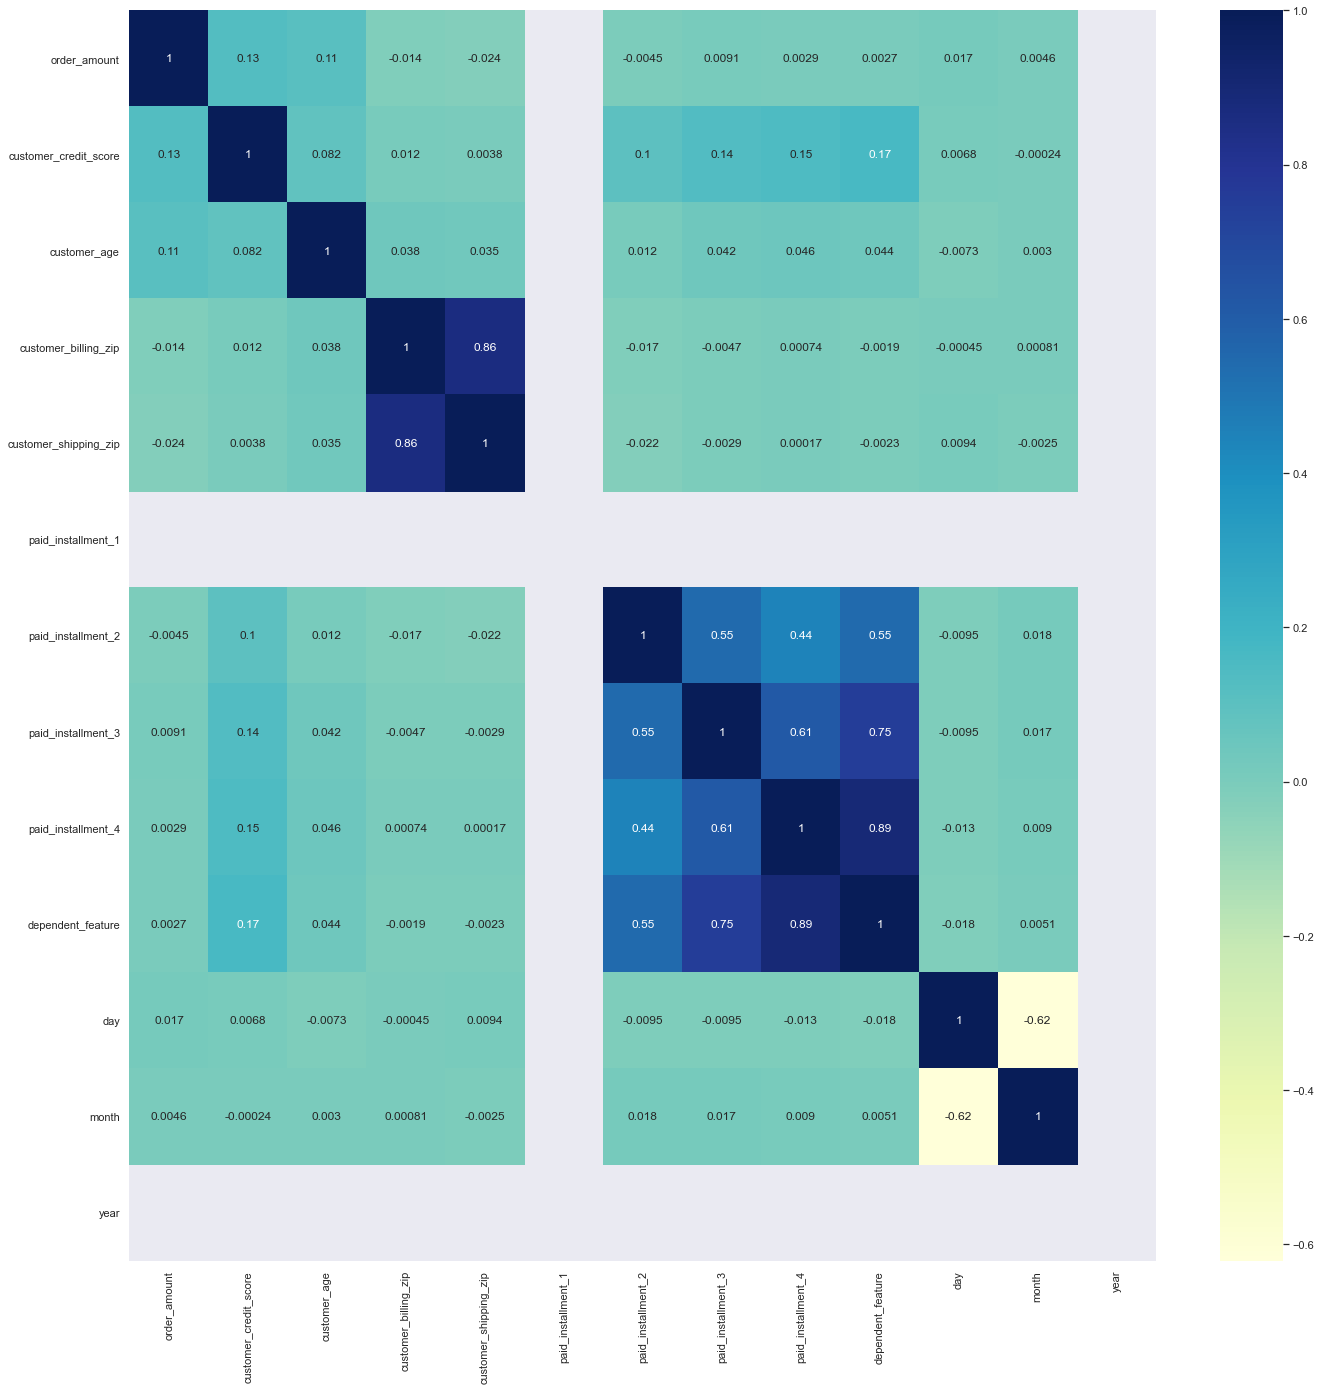

In [62]:
# plotting correlation heatmap
sns.set(rc={'figure.figsize':(23,23)})
sns.heatmap(df.corr(), cmap="YlGnBu",annot=True)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='customer_credit_score', ylabel='dependent_feature'>

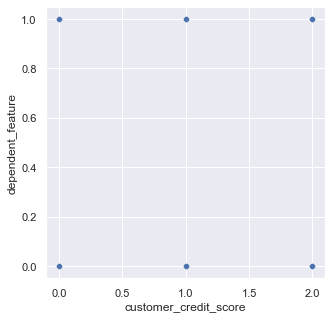

In [63]:
sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(df['customer_credit_score'],df['dependent_feature'])

In [64]:
df.groupby('customer_credit_score')['dependent_feature'].count().reset_index()

,customer_credit_score,dependent_feature
0,0,729
1,1,7582
2,2,1640


In [65]:
pd.crosstab(df['customer_credit_score'],df['dependent_feature'])

dependent_feature,0,1
customer_credit_score,,
0,157,572
1,517,7065
2,20,1620


In [66]:
pd.crosstab(df['customer_age'],df['dependent_feature'])

dependent_feature,0,1
customer_age,,
0,498,5889
1,168,2790
2,28,578


In [67]:
# Weight of evidence & information value for customer credit score feature
feature,target = 'customer_credit_score','dependent_feature'
df_woe_iv = (pd.crosstab(df[feature],df[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

df_woe_iv

#It is clearly visible that with customers having high credit score are expected to default less. 
#Also, the information value ~0.47 suggests that the feature is important with respect to dependent feature 

dependent_feature,0,1,woe,iv
customer_credit_score,,,,
0,0.226225,0.061791,-1.297770,0.477524
1,0.744957,0.763206,0.024202,0.477524
2,0.028818,0.175003,1.803786,0.477524


In [68]:
# Weight of evidence & informaition value for customer age feature
feature,target = 'customer_age','dependent_feature'
df_woe_iv = (pd.crosstab(df[feature],df[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

df_woe_iv

#It is clearly visible that with increase in age, customers are less likely to default 
#Also, the information value ~0.03 suggests that the feature is a weak predictor.

dependent_feature,0,1,woe,iv
customer_age,,,,
0,0.717579,0.636167,-0.120422,0.032453
1,0.242075,0.301394,0.219170,0.032453
2,0.040346,0.062439,0.436706,0.032453


In [70]:
df.drop(['order_id','customer_id','merchant_id', 'paid_installment_1', 'paid_installment_2','paid_installment_3', 'paid_installment_4'], axis='columns', inplace=True)

In [71]:
df.head()

,order_amount,customer_credit_score,customer_age,customer_billing_zip,customer_shipping_zip,dependent_feature,day,month,year
0,147.20,1,0,1,1,1,3,10,2018
1,69.95,1,0,2,2,1,21,9,2018
2,45.00,1,1,3,3,1,15,9,2018
3,164.00,1,0,4,4,1,10,10,2018
4,69.17,0,0,5,5,1,12,9,2018


Great! Our data is ready for our machine learning models.
Let's start by splitting our data into a training set and test set

In [73]:
# Splitting the data into train and test
X=df.copy()
del X['dependent_feature']
y= df[['dependent_feature']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((6965, 8), (2986, 8))

Training and Predicting

# Random Forest Score

In [74]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

classifier_rf.oob_score_

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

<ipython-input-74-ed7b6289d6f7>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier_rf.fit(X_train, y_train)


In [75]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

grid_search.best_score_

rf_best = grid_search.best_estimator_
rf_best

Fitting 4 folds for each of 180 candidates, totalling 720 fits


C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=30,
                       n_jobs=-1, random_state=42)

In [76]:
classifier_rf = RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

classifier_rf.fit(X_train, y_train)

<ipython-input-76-7a9ea3b263b2>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [77]:
y_pred= classifier_rf.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# confusion_matrix funnction a matrix containing the summary of predictions
print(confusion_matrix(y_test, y_pred))

[[   0  208]
 [   0 2778]]


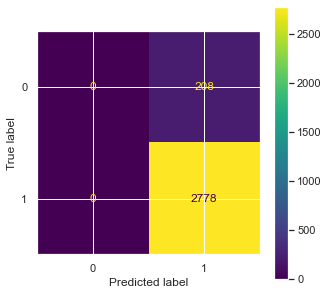

In [79]:
# plot_confusion_matrix function is used to visualize the confusion matrix
plot_confusion_matrix(classifier_rf, X_test, y_test)
plt.show()

In [80]:
# Importing all necessary libraries
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Calculating the precision score of classifier
print(f"Precision Score of the classifier is: {precision_score(y_test, y_pred)}")
# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(y_test, y_pred)}")
# Calculating the F1 score of classifier
print(f"F1 Score of the classifier is: {f1_score(y_test, y_pred)}")

Precision Score of the classifier is: 0.9303415941058272
Recall Score of the classifier is: 1.0
F1 Score of the classifier is: 0.9639139486467732


Given below are the outcomes/findings from the model-

● Which features show strong correlation with a customer’s likelihood of paying back installments?
- Following features show the strong correlation with a customer's likelihood of paying back installments.
  1 Customer credit rating feature- The information value ~0.47 suggests that the feature is a strong predictor with respect to     dependent feature. It is observed that customers having high credit score are expected to default less. Customers               having credit rating above 700 are less defaulters ~1.2%. However, this is a trend derived after replacing the null values     in all installments features as 1 (customers have paid back their installment), especially in installment 4 where ~6% of       the values were null.   
  
● Which features should be discarded? Why? 
- Following features should be discarded:
  1 checkout_started_at- The feature has similar values as credit_decision_started_at and creating redundant information for       the model. Also, credit_decision_started_at feature was use to create new columns- day, month and year.
  2 approved_for_installments- This feature was dropped as it has only one class- 'True' which is not usefull for model
  3 order_id- This feature was having categorical values and not also not usefull for model
  4 customer_id- This feature was having categorical values and not also not usefull for model
  5 merchant_id- This feature was having categorical values and not also not usefull for model
  6 All installment features- As we have already created dependent feature by using them, so they will be highly correlated         with dependent feature and not required for model.
  
● What surprised you about the results/trends observed in the data?
- There were few uncertain trends seen while performing exploratory data analysis 
  1 Customers having credit score b/w 300 and 500 are more like to default ~21%
  2 Customers with age brackets (15 & 35) and (35 & 55) have similiar likelihood to be defaulters ~6-7%

● What additional data would you like to see that might help build a better installment approval classifier? 
- I would like to see more data/features related to geographical information like region as the current data is at               customer_billing_zip and customer_shipping_zip which is quite granular. Features like region segmentation would help us         to understand the default customers and non-default customers trend region wise. This could be helpful in future prediction     of categorizing the new customer.
- Also, the dataset is quite small. It impacts the overall results of the model.  

● What would be your next steps to train/build a model that we could use to make real time customer approval decisions?
- Next steps would be to fine tune the model so that it doesn't fall in underfitting or overfitting category. Then to deploy     the model at website/location for default/non-default customers identification. 